In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Yet another coin flipping problem

### Mohsin Javed, June 4, 2019 (Eid-ul-Fitar day, Oxford, UK)

We are given an array of integers starting 
from $0$ and ending at $100$. We start from $0$ and 
start flipping a fair coin. If a head comes down, 
we advance by $1$ unit from our current position and 
if a tail comes down we advance by $2$ units from our currnet position. 
For example, starting from $0$, if the first coin flip is a head, we move
to $1$, otherwise, we skip $1$ and move to $2$. 
We continue flipping the coin and keep moving forward until we 
reach hundred or beyond. 

The question is, which number from $1$ to $100$ in the array has the 
largest probability of being visited?  

Let $p_k$ be the probability of integer $k$ being visited and let 
$T_k$ be a binomial random variable representing the $k^{th}$ toss. 

Then, $ p_1 = 1/2,$ because the 
only way we land at $1$ is if the first toss is a head and the probability of a head on the 
first toss is $1/2$.

To calculate $p_2$, we condition on the first toss,

\begin{align*}
p_2 &= P(\textrm{ visiting 2 }| T_1 = Head)P(T_1 = Head) + P(\textrm{ visiting 2 }|T_1 = Tail)P(T_1 = Tail)\\
p_2 &= (1/2) (1/2) + (1) (1/2)\\
p_2 &= 3/4.
\end{align*}

We can now calculate $p_3$ but we can direclty attemp to calculate $p_k$ in general. Notice that we can visit $k$ only if we are first at $k-1$ or $k-2$. This gives us a nice recurrence relation:

\begin{align*}
p_k &= P(\textrm{ visiting } k| \textrm{ visited } k-1 )P(\textrm{ visiting } k-1)
+ P(\textrm{ visiting } k | \textrm{ visited } k-2)P(\textrm{ visiting } k-2) \\
p_k &= \frac{1}{2} p_{k-1} + \frac{1}{2} p_{k-2}. 
\end{align*}

This is a beautiful second order recurrence relation. The probability of visiting a number is precisely 
the average of the proababilities of visiting the previous two numbers!

We can solve this recurrence relation using standard methods. The solution is of the form 

$$p_k = Ar_1^k + Br_2^k,$$

where $r_1$ and $r_2$ are the roots of the corresponding characteristic 
equation,

$$ r^2 = \frac{1}{2} r + \frac{1}{2}. $$

Solving the above quadratic, we get $r_1 = 1, r_2 = -1/2$, and using the initial conditions 
given by $p_1,p_2$, we can get the values of $A$ and $B$ as well, resulting in the final 
solution:

$$ p_k = \frac{1}{3} \left(\frac{2^{k+1}+(-1)^k}{2^k} \right).$$


Let us now write a short piece of code to plot the probabilities.

In [22]:
p = 101 * [0]; p[0] = 0; p[1] = 1.0/2.0; p[2] = 3.0/4.0
for i in range(3,101):
    p[i] = (1.0/2.0)*(p[i-1] + p[i-2])    
for i in range(101):
    print('p_{0:02d} = {1}'.format(i, p[i] ))

p_00 = 0
p_01 = 0.5
p_02 = 0.75
p_03 = 0.625
p_04 = 0.6875
p_05 = 0.65625
p_06 = 0.671875
p_07 = 0.6640625
p_08 = 0.66796875
p_09 = 0.666015625
p_10 = 0.6669921875
p_11 = 0.66650390625
p_12 = 0.666748046875
p_13 = 0.6666259765625
p_14 = 0.66668701171875
p_15 = 0.666656494140625
p_16 = 0.6666717529296875
p_17 = 0.6666641235351562
p_18 = 0.6666679382324219
p_19 = 0.6666660308837891
p_20 = 0.6666669845581055
p_21 = 0.6666665077209473
p_22 = 0.6666667461395264
p_23 = 0.6666666269302368
p_24 = 0.6666666865348816
p_25 = 0.6666666567325592
p_26 = 0.6666666716337204
p_27 = 0.6666666641831398
p_28 = 0.6666666679084301
p_29 = 0.666666666045785
p_30 = 0.6666666669771075
p_31 = 0.6666666665114462
p_32 = 0.6666666667442769
p_33 = 0.6666666666278616
p_34 = 0.6666666666860692
p_35 = 0.6666666666569654
p_36 = 0.6666666666715173
p_37 = 0.6666666666642413
p_38 = 0.6666666666678793
p_39 = 0.6666666666660603
p_40 = 0.6666666666669698
p_41 = 0.6666666666665151
p_42 = 0.6666666666667425
p_43 = 0.66666666666

<IPython.core.display.Javascript object>


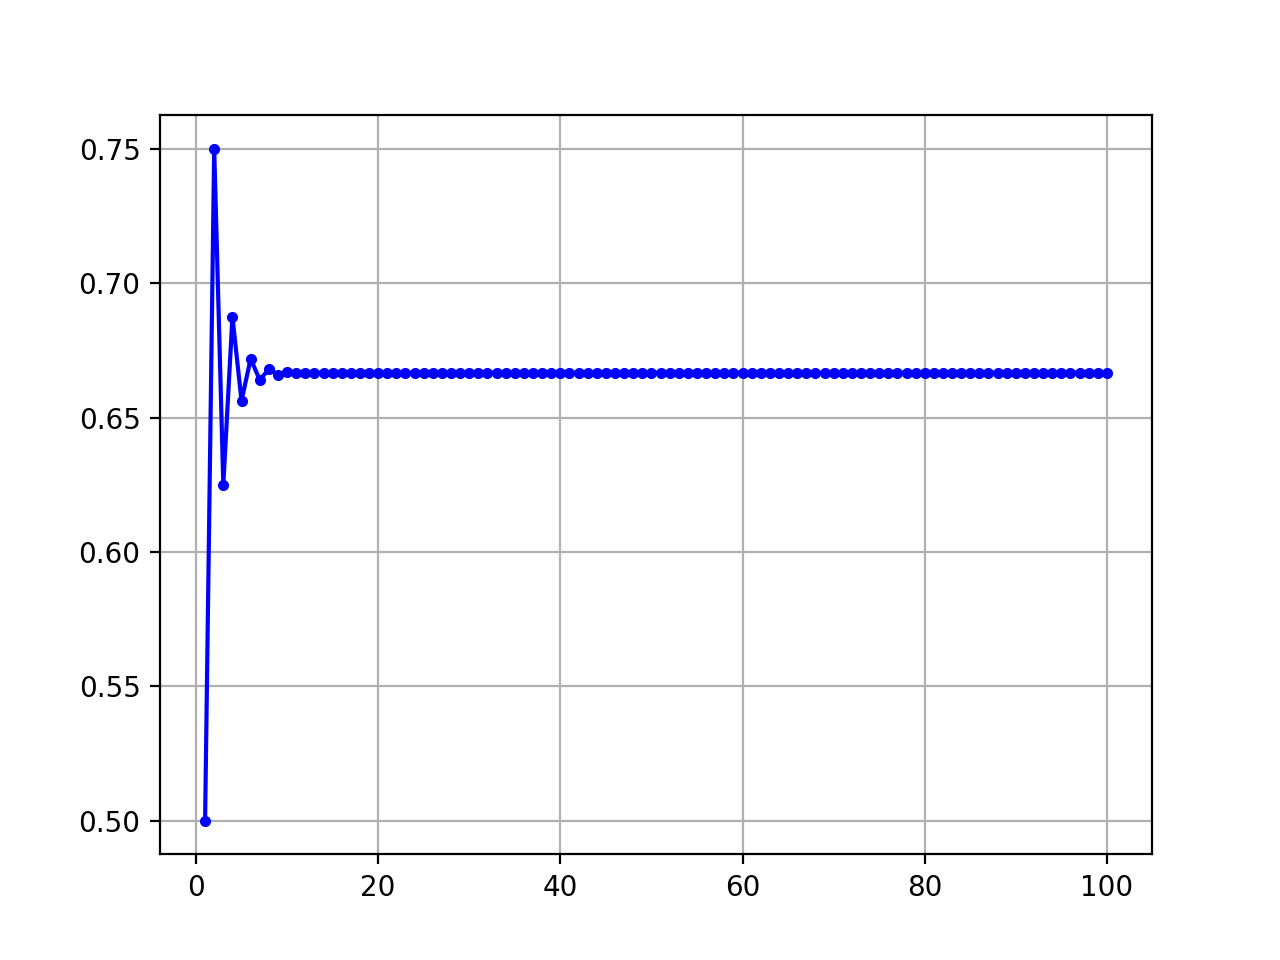

In [24]:
plt.plot(np.r_[1:101], p[1:101], 'b.-')
plt.grid(True)

It seems that $p_2 = 3/4$ is the peak, so $2$ has the hightest probability of 
being visited. Also,

$$\lim_{k \to \infty} p_k = 2/3.$$

## Simulation

We now pretend we didn't know the answer and write a numerical simulation for the problem. 

First, we generate a large number of coin flipping games. For each game, we flip $100$ coins. We don't need $100$ coin flips to go past $100$ in each run but in a worst case of all $100$ heads, we will just make it!

In [25]:
# Number of games
N = int(1e5) 
# For each game, flip 100 coins (a sequence of 0s and 1s) 1: Head, 0: Tail
coin_flips = np.random.binomial(1, 1.0/2.0, size=(N, 100)) 

To convert a series of coin flips to the numbers visited, we replace the tails (zeros) with twos and then 
simply do a cumulative sum (remember a tail meant moving two steps):

In [26]:
path = coin_flips.copy()
path[path==0] = 2
path = path.cumsum(axis=1)
path

array([[  1,   2,   3, ..., 151, 152, 153],
       [  2,   3,   5, ..., 147, 149, 150],
       [  2,   4,   5, ..., 150, 151, 153],
       ...,
       [  1,   3,   4, ..., 158, 160, 161],
       [  1,   3,   4, ..., 147, 149, 151],
       [  1,   3,   4, ..., 147, 149, 151]])

Now let's count how many times each umber is visited:

In [27]:
counts = {}
for i in range(path.shape[0]):
    for j in range(path.shape[1]):
        if path[i][j] not in counts:
            counts[path[i][j]] = 1
        else:
            counts[path[i][j]] += 1

We can easily convert these counts to probability estimates. (We are ignoring numbers above 100.)

In [28]:
probabilities = {k: v/N for (k, v) in counts.items() if k <= 100}

<IPython.core.display.Javascript object>


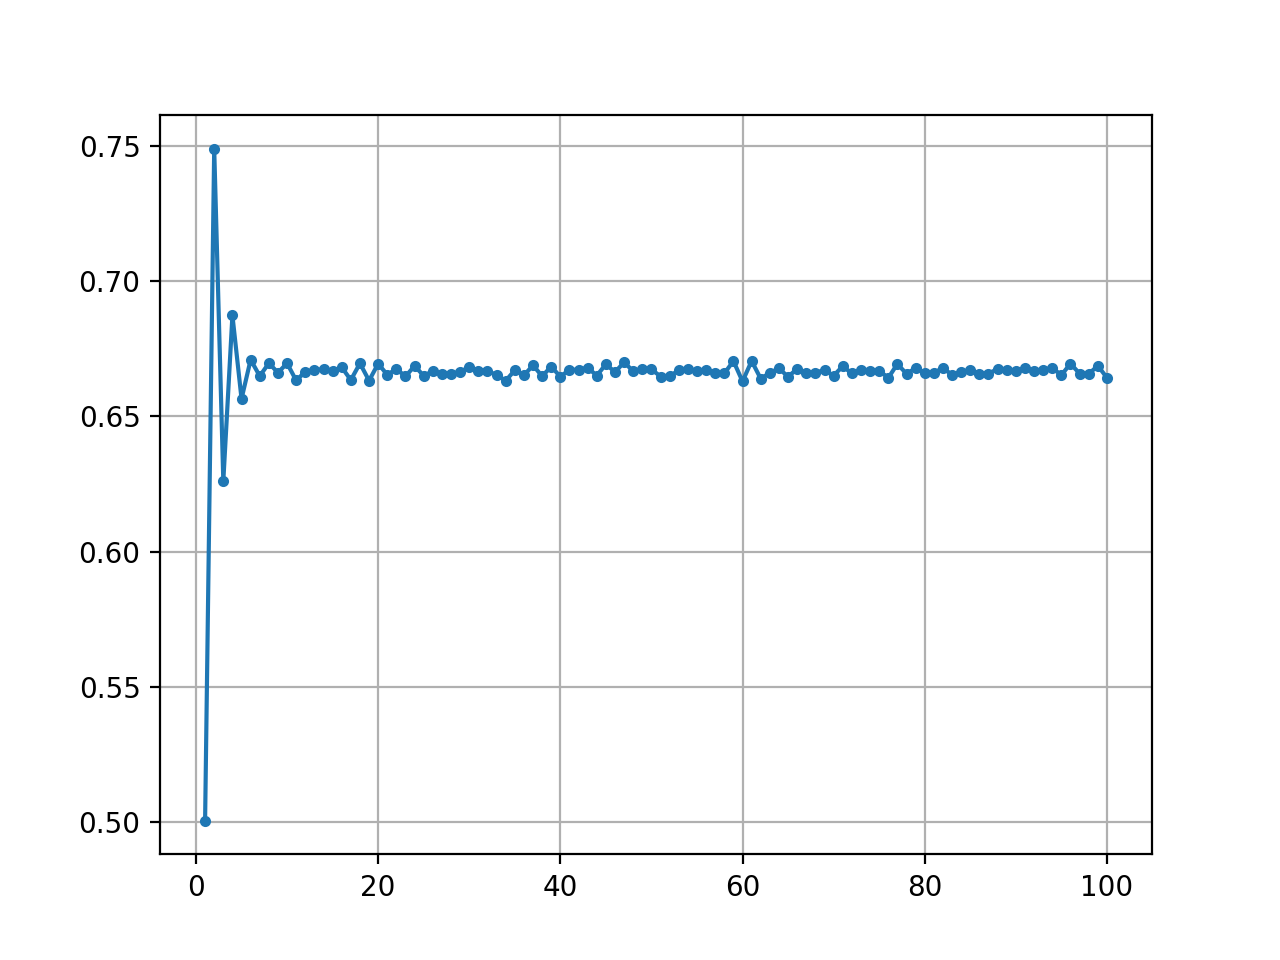

In [29]:
lists = sorted(probabilities.items())
k, p_k = zip(*lists)
plt.figure()
plt.plot(k, p_k, '.-')
plt.grid(True)

In [13]:
for i in range(1, 101):
    print('p_{0:02d} = {1}'.format(i, probabilities[i]))

p_01 = 0.50009
p_02 = 0.75087
p_03 = 0.6243
p_04 = 0.68682
p_05 = 0.65953
p_06 = 0.66859
p_07 = 0.66475
p_08 = 0.66858
p_09 = 0.66614
p_10 = 0.66743
p_11 = 0.66626
p_12 = 0.66693
p_13 = 0.66513
p_14 = 0.66807
p_15 = 0.66678
p_16 = 0.66552
p_17 = 0.66466
p_18 = 0.66774
p_19 = 0.66756
p_20 = 0.66543
p_21 = 0.66673
p_22 = 0.66851
p_23 = 0.66689
p_24 = 0.66584
p_25 = 0.66847
p_26 = 0.66562
p_27 = 0.66613
p_28 = 0.6683
p_29 = 0.66505
p_30 = 0.66997
p_31 = 0.66626
p_32 = 0.66795
p_33 = 0.66703
p_34 = 0.66459
p_35 = 0.66951
p_36 = 0.66467
p_37 = 0.6654
p_38 = 0.66514
p_39 = 0.66769
p_40 = 0.66621
p_41 = 0.66604
p_42 = 0.66455
p_43 = 0.66884
p_44 = 0.66595
p_45 = 0.66735
p_46 = 0.66647
p_47 = 0.66654
p_48 = 0.6679
p_49 = 0.66677
p_50 = 0.66618
p_51 = 0.6676
p_52 = 0.66722
p_53 = 0.66759
p_54 = 0.66565
p_55 = 0.66623
p_56 = 0.6644
p_57 = 0.67011
p_58 = 0.66499
p_59 = 0.66794
p_60 = 0.66647
p_61 = 0.66732
p_62 = 0.66648
p_63 = 0.66633
p_64 = 0.66837
p_65 = 0.66629
p_66 = 0.6678
p_67 = 0.66517
p_

We can see the mild convergence of $p_k$ to $2/3$ in the first two digits!